In [1]:
## Making plot for heat & volume fluxes
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import gsw

In [2]:
# Datasets
# sill-fjord depth ratio hs/hf
hr = np.array([0.04, 0.06, 0.08, 0.10, 0.12, 1])

# Heat fluxes J/s
H0f = np.array([2.51, 2.78, 2.96, 3.05, 2.88, 2.38])*1e11
H0s = np.array([-2.54, -2.81, -2.99, -3.08, -2.91, -2.41])*1e11
H1f = np.array([2.83, 3.09, 3.20, 3.19, 2.95, 2.45])*1e11
H1s = np.array([-2.85, -3.12, -3.24, -3.22, -2.99, -2.48])*1e11
H2f = np.array([0.87, 1.32, 1.69, 2.00, 2.22, 2.49])*1e11
H2s = np.array([-0.88, -1.35, -1.72, -2.03, -2.26, -2.53])*1e11
Hr = np.array([-2.05, -1.94, -1.60, -1.36, -0.73, 0.04])*1e11

# Volume fluxes m3/s
Q0f = np.array([7154, 7683, 8026, 8159, 7658, 6298])
Q0s = np.array([-6904, -7433, -7776, -7909, -7408, -6048])
Q1f = np.array([8041, 8514, 8653, 8507, 7849, 6466])
Q1s = np.array([-7792, -8264, -8404, -8257, -7600, -6216])
Q2f = np.array([2447, 3636, 4571, 5344, 5911, 6573])
Q2s = np.array([-2199, -3386, -4323, -5094, -5662, -6323])
Qr = np.array([-5647, -5188, -4215, -3535, -1899, 99])


# Submarine melting m3/s
Qsm = np.array([9.92, 10.32, 10.36, 10.52, 10.86, 9.30])


# Magnitudes relative to the no-sill case
H0 = np.abs(H0s[:-1] / H0s[-1])
H1 = np.abs(H1s[:-1] / H1s[-1])
H2 = np.abs(H2s[:-1] / H2s[-1])
Hr1 = np.abs(Hr[:-1] / Hr[-1])
             
Q0 = np.abs(Q0s[:-1] / Q0s[-1])
Q1 = np.abs(Q1s[:-1] / Q1s[-1])
Q2 = np.abs(Q2s[:-1] / Q2s[-1])
Qr1 = np.abs(Qr[:-1] / Qr[-1])
Qsmr = np.abs(Qsm[:-1] / Qsm[-1])

In [7]:
Q0, Q1, Q2, Qr1, Qsmr

(array([1.14153439, 1.22900132, 1.28571429, 1.30770503, 1.22486772]),
 array([1.25353925, 1.32947233, 1.35199485, 1.3283462 , 1.22265122]),
 array([0.34777795, 0.5355053 , 0.68369445, 0.80563024, 0.89546102]),
 array([57.04040404, 52.4040404 , 42.57575758, 35.70707071, 19.18181818]),
 array([1.06666667, 1.10967742, 1.11397849, 1.1311828 , 1.16774194]))

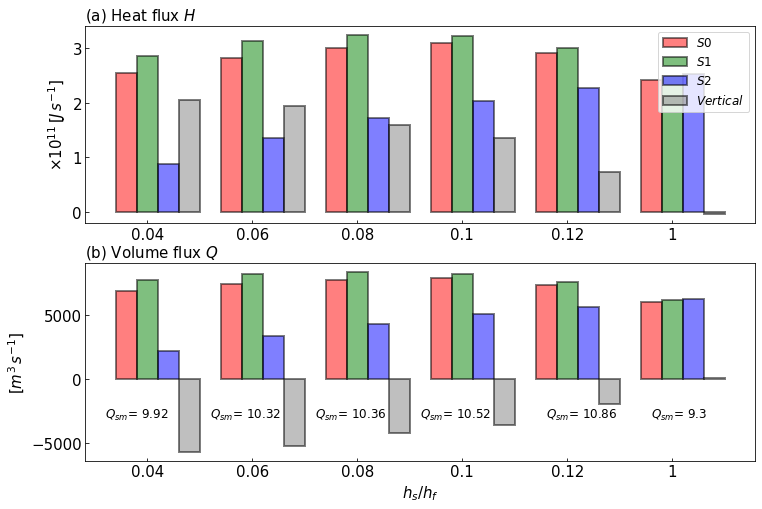

In [3]:
# Making histogram
labels1 = [0.04, 0.06, 0.08, 0.10, 0.12, 1]


N = np.arange(len(labels1))  # the label locations
width = 0.2  # the width of the bars


fig0 = plt.figure(figsize=(12,8))
fig0.tight_layout()

ax0 = fig0.add_subplot(211)
ax0.bar(N - width, -H0s/1e11, width, label=r'$S0$', facecolor='r', edgecolor='k', linewidth=2, alpha=.5)
ax0.bar(N , -H1s/1e11, width, label=r'$S1$', facecolor='g', edgecolor='k', linewidth=2, alpha=.5)
ax0.bar(N + width, -H2s/1e11, width, label=r'$S2$', facecolor='b', edgecolor='k', linewidth=2, alpha=.5)
ax0.bar(N + 2*width, -Hr/1e11, width, label=r'$Vertical$', facecolor='grey', edgecolor='k', linewidth=2, alpha=.5)

ax0.legend(loc='upper right', fontsize=12)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax0.set_ylabel(r'$\times10^{11}\,[J\,s^{-1}]$', fontsize=15)
ax0.set_xticks(N)
ax0.set_xticklabels(labels1, fontsize=15)
#ax0.set_xlabel('$h_s/h_f$', fontsize=20)
#ax0.xaxis.set_visible(False)
ax0.tick_params(direction='in', labelsize=15)

ax0.set_title('(a) Heat flux $H$', loc='left', size=15)

ax1 = fig0.add_subplot(212)
ax1.bar(N - width, -Q0s, width, label=r'$S0$', facecolor='r', edgecolor='k', linewidth=2, alpha=.5)
ax1.bar(N , -Q1s, width, label=r'$S1$', facecolor='g', edgecolor='k', linewidth=2, alpha=.5)
ax1.bar(N + width, -Q2s, width, label=r'$S2$', facecolor='b', edgecolor='k', linewidth=2, alpha=.5)
ax1.bar(N + 2*width, Qr, width, label=r'$Vertical$', facecolor='grey', edgecolor='k', linewidth=2, alpha=.5)

ax1.text(-.4, -3000 ,'$Q_{sm}$= '+str(Qsm[0]), fontsize=12)
ax1.text(.6, -3000 ,'$Q_{sm}$= '+str(Qsm[1]), fontsize=12)
ax1.text(1.6, -3000 ,'$Q_{sm}$= '+str(Qsm[2]), fontsize=12)
ax1.text(2.6, -3000 ,'$Q_{sm}$= '+str(Qsm[3]), fontsize=12)
ax1.text(3.8, -3000 ,'$Q_{sm}$= '+str(Qsm[4]), fontsize=12)
ax1.text(4.8, -3000 ,'$Q_{sm}$= '+str(Qsm[5]), fontsize=12)

ax1.set_title('(b) Volume flux $Q$', loc='left', size=15)
ax1.set_ylabel(r'$[m^3\,s^{-1}]$', fontsize=15)
ax1.set_xticks(N)
ax1.set_xticklabels(labels1, fontsize=15)
ax1.set_xlabel('$h_s/h_f$', fontsize=15)
ax1.tick_params(direction='in', labelsize=15)


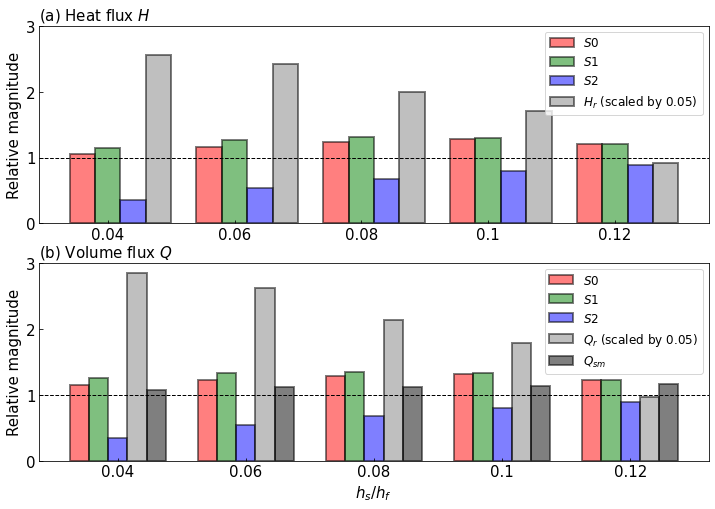

In [4]:
# Making histogram relative to hs/hf=1 case
labels2 = [0.04, 0.06, 0.08, 0.10, 0.12]


N = np.arange(len(labels2))  # the label locations
width1 = 0.2  # the width of the bars


fig1 = plt.figure(figsize=(12,8))
fig1.tight_layout()

ax0 = fig1.add_subplot(211)
ax0.bar(N - width1, H0, width1, label=r'$S0$', facecolor='r', edgecolor='k', linewidth=2, alpha=.5)
ax0.bar(N , H1, width1, label=r'$S1$', facecolor='g', edgecolor='k', linewidth=2, alpha=.5)
ax0.bar(N + width1, H2, width1, label=r'$S2$', facecolor='b', edgecolor='k', linewidth=2, alpha=.5)
ax0.bar(N + 2*width1, Hr1/20, width1, label=r'$H_r$ (scaled by 0.05)', facecolor='grey', edgecolor='k', linewidth=2, alpha=.5)
ax0.axhline(y=1, ls='--', color='k',lw=1)
ax0.legend(loc='upper right', fontsize=12)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax0.set_ylabel(r'Relative magnitude', fontsize=15)
ax0.set_ylim([0, 3])
ax0.set_yticks([0,1,2,3])
ax0.set_yticklabels([0, 1, 2, 3], fontsize=15)
ax0.set_xticks(N)
ax0.set_xticklabels(labels2, fontsize=15)
#ax0.set_xlabel('$h_s/h_f$', fontsize=20)
#ax0.xaxis.set_visible(False)
ax0.tick_params(direction='in', labelsize=15)

ax0.set_title('(a) Heat flux $H$', loc='left', size=15)

ax1 = fig1.add_subplot(212)
width2 = 0.15  # the width of the bars
ax1.bar(N - 2*width2, Q0, width2, label=r'$S0$', facecolor='r', edgecolor='k', linewidth=2, alpha=.5)
ax1.bar(N - width2 , Q1, width2, label=r'$S1$', facecolor='g', edgecolor='k', linewidth=2, alpha=.5)
ax1.bar(N , Q2, width2, label=r'$S2$', facecolor='b', edgecolor='k', linewidth=2, alpha=.5)
ax1.bar(N + width2, Qr1/20, width2, label=r'$Q_r$ (scaled by 0.05)', facecolor='grey', edgecolor='k', linewidth=2, alpha=.5)
ax1.bar(N + 2*width2, Qsmr, width2, label=r'$Q_{sm}$', facecolor='k', edgecolor='k', linewidth=2, alpha=.5)
ax1.axhline(y=1, ls='--', color='k',lw=1)
ax1.legend(loc='upper right', fontsize=12)

ax1.set_title('(b) Volume flux $Q$', loc='left', size=15)
ax1.set_ylabel(r'Relative magnitude', fontsize=15)
ax1.set_ylim([0, 3])
ax1.set_yticks([0,1,2,3])
ax1.set_yticklabels([0, 1, 2, 3], fontsize=15)
ax1.set_xticks(N)
ax1.set_xticklabels(labels2, fontsize=15)
ax1.set_xlabel('$h_s/h_f$', fontsize=15)
ax1.tick_params(direction='in', labelsize=15)


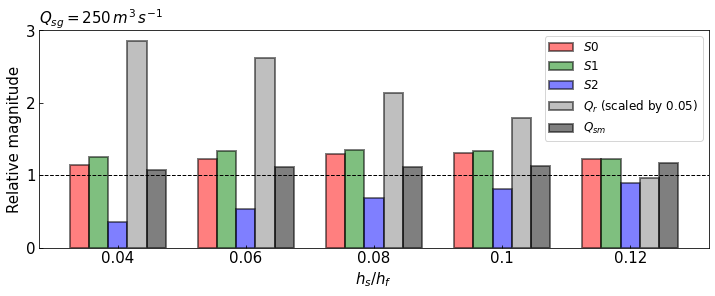

In [6]:
# Making histogram relative to hs/hf=1 case (Volume flux only)
labels2 = [0.04, 0.06, 0.08, 0.10, 0.12]


N = np.arange(len(labels2))  # the label locations
width1 = 0.2  # the width of the bars


fig2 = plt.figure(figsize=(12,4))
fig2.tight_layout()


ax1 = fig2.add_subplot(111)
width2 = 0.15  # the width of the bars
ax1.bar(N - 2*width2, Q0, width2, label=r'$S0$', facecolor='r', edgecolor='k', linewidth=2, alpha=.5)
ax1.bar(N - width2 , Q1, width2, label=r'$S1$', facecolor='g', edgecolor='k', linewidth=2, alpha=.5)
ax1.bar(N , Q2, width2, label=r'$S2$', facecolor='b', edgecolor='k', linewidth=2, alpha=.5)
ax1.bar(N + width2, Qr1/20, width2, label=r'$Q_r$ (scaled by 0.05)', facecolor='grey', edgecolor='k', linewidth=2, alpha=.5)
ax1.bar(N + 2*width2, Qsmr, width2, label=r'$Q_{sm}$', facecolor='k', edgecolor='k', linewidth=2, alpha=.5)
ax1.axhline(y=1, ls='--', color='k',lw=1)
ax1.legend(loc='upper right', fontsize=12)

ax1.set_title('$Q_{sg}=250\,m^3\,s^{-1}$', loc='left', size=15)
ax1.set_ylabel(r'Relative magnitude', fontsize=15)
ax1.set_ylim([0, 3])
ax1.set_yticks([0,1,2,3])
ax1.set_yticklabels([0, 1, 2, 3], fontsize=15)
ax1.set_xticks(N)
ax1.set_xticklabels(labels2, fontsize=15)
ax1.set_xlabel('$h_s/h_f$', fontsize=15)
ax1.tick_params(direction='in', labelsize=15)


In [7]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
#fig_path ="/Users/weiyangbao/Documents/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
#fig0.savefig(fig_path + '/H&Q_lower-.png', dpi=300, bbox_inches='tight')
#fig1.savefig(fig_path + '/H&Q_relative.png', dpi=300, bbox_inches='tight')
fig2.savefig(fig_path + '/VolFlux_relative.png', dpi=300, bbox_inches='tight')